In [82]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import bct
import functions as func
import matplotlib.cm as cm

In [73]:
def generate_connectivity_matrix(Num, num_blocks, connected_blocks, p_intra=1.0, p_bg=0.01, p_inter=0.5):
    mat=np.random.choice([0,1],size=(Num,Num),p=[1-p_bg,p_bg]) ## generate background matrix with p_bg
    block_size=int(Num/num_blocks)
    #print("block size: ", block_size)
    block_indices=np.arange(0,Num+1,block_size)
    #print("block indexes: ", block_indices)
    for i1 in range(num_blocks): ### for intra block probabilities
        start_index=block_indices[i1]
        stop_index=block_indices[i1+1]
        mat[start_index:stop_index,start_index:stop_index]=np.random.choice([0,1],size=(block_size,block_size),p=[1-p_intra,p_intra])
    for j1,k1 in connected_blocks: ### for inter block probabilities
        mat[block_indices[j1]:block_indices[j1+1],block_indices[k1]:block_indices[k1+1]]=np.random.choice([0,1],size=(block_size,block_size),p=[1-p_inter,p_inter])
    #This function returns the connectivity matrix
    return mat

### To use the connectvitiy matrix in brian, you must do the following:
connecivity_matrix = generate_connectivity_matrix(Num,num_blocks,connected_blocks) # first generate the connectivity matrix

pre_indices,post_indices = connecivity_matrix.nonzero() ## extract indexes of non-zero elements in the connectivity matrix

### The non-zero indexes are the arguments for the synapses functions. You can use it in the following manner
synapses_e2e.connect(i=pre_indices,j=post_indices)
### for e2i, i2i, i2e, we want to connect with the average probabilities. this is just the sum of the connectivity matrix divided by size
average_p=np.sum(connecivity_matrix)/(connecivity_matrix.size)

synapses_e2i.connect(p=average_p)

synapses_i2i.connect(p=average_p)

synapses_i2e.connect(p=average_p)

In [56]:
def generate_structure_matrix(num_blocks, connected_blocks):
    #This function is only for the blocks. not a connectivity matrix
    mat=np.zeros((num_blocks,num_blocks))
    for i0 in range(num_blocks): #for all self connections
        mat[i0,i0]=1
    for i2,j2 in connected_blocks: #interconnected blocks
        mat[i2,j2]=0.5
    return mat

In [57]:
N=200
num_blocks=10
np.random.seed(42)
connected_pairs=np.random.randint(0,num_blocks,size=(10,2))
#connected_pairs=[[3,4],[4,5],[5,6],[4,3],[5,4],[6,5]]

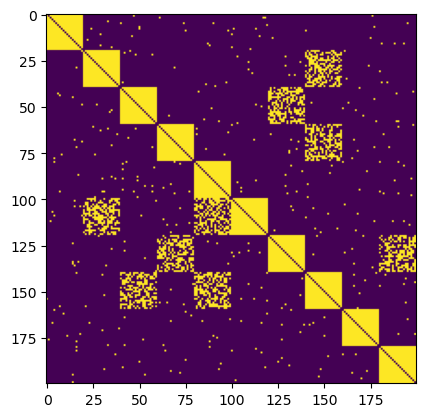

In [58]:
conmat=generate_connectivity_matrix(N,num_blocks,connected_pairs)
for i in range(N):
    conmat[i,i]=0
plt.imshow(conmat)

In [59]:
# Create adjacency matrix for weighted directed graph
#structural_connectivity_matrix = nx.from_numpy_array(conmat)

#print("Structural Connectivity Matrix:")
#print(structural_connectivity_matrix)

In [60]:
# Create structural connectivity matrix
structural_connectivity_matrix = conmat

#print("Structural Connectivity Matrix:")
#print(structural_connectivity_matrix)

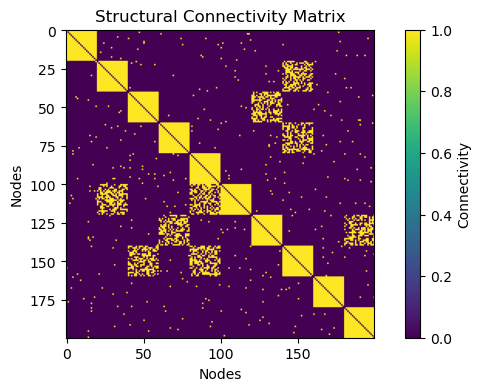

In [61]:
plt.figure(figsize=(8, 4))
plt.imshow(structural_connectivity_matrix, cmap='viridis')
plt.title("Structural Connectivity Matrix")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.colorbar(label='Connectivity')
plt.show()

In [62]:
# Create directed graph from structural connectivity matrix
# 1. Use nx.from_numpy_array() to create the graph directly from the matrix.
# networkx automatically handles the non-zero values as edge weights.
G_weighted_directed = nx.from_numpy_array(structural_connectivity_matrix,create_using=nx.DiGraph())

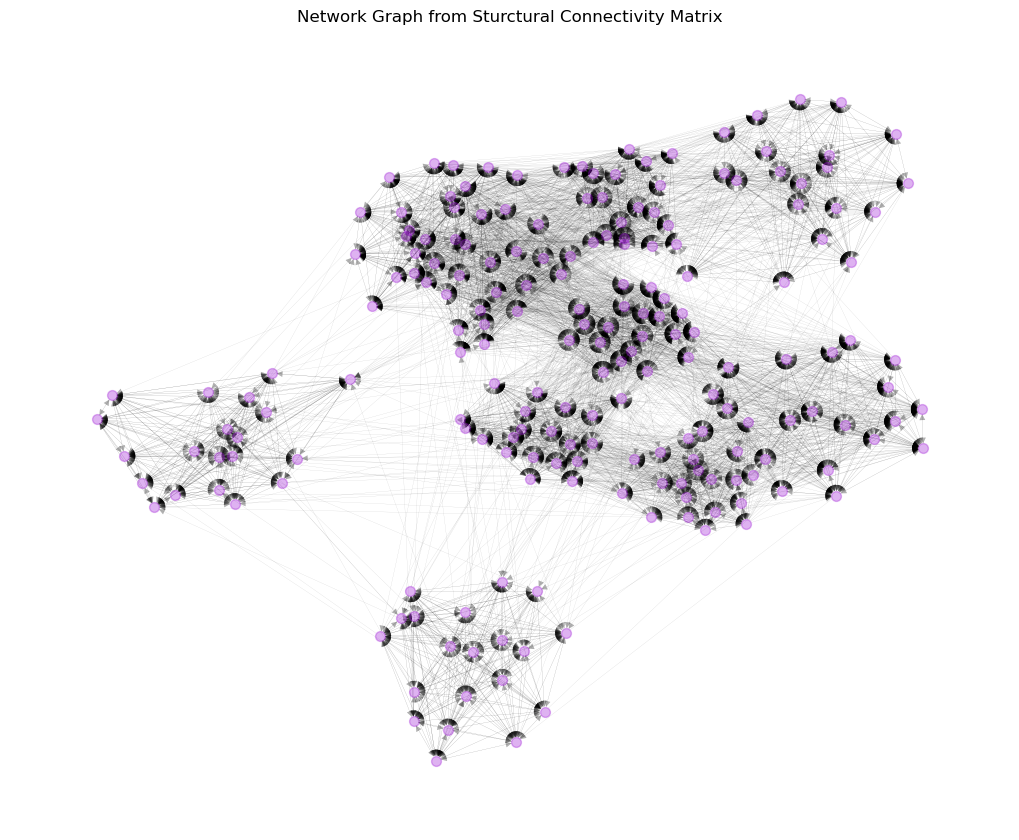

In [71]:
# Draw the graph with edge labels showing weights
plt.figure(figsize=(10, 8))
#seed = np.random.randint(0,999,1)
#print(seed)
pos = nx.spring_layout(G_weighted_directed, k=0.5,seed=4)
weights=[d['weight']*2 for _,_,d in G_weighted_directed.edges(data=True)]
nx.draw(G_weighted_directed, pos, node_color='darkviolet', node_size=50, width=0.1, alpha = 0.3)

#nx.draw_networkx_edges(G_weighted_directed, pos,width=weights)
#nx.draw_networkx_labels(G_weighted_directed, pos, font_size=16, font_weight='bold')

# Add edge labels with weights
#edge_labels = nx.get_edge_attributes(G_weighted_directed, 'weight')
#edge_labels = {k: f'{v:.1f}' for k, v in edge_labels.items()}  # Format to 1 decimal
#nx.draw_networkx_edge_labels(G_weighted_directed, pos, edge_labels=edge_labels,bbox=dict(facecolor='white',edgecolor='none',boxstyle='round,pad=0.2'))

#add a title + print
plt.title("Network Graph from Sturctural Connectivity Matrix")
plt.savefig("./Figures/SC_graph.png",dpi=100)
plt.show()

#print("\nEdges with weights in weighted directed graph:")
#for edge in G_weighted_directed.edges(data=True):
#    print(f"{edge[0]} -> {edge[1]}: weight = {edge[2]['weight']:.1f}")

In [76]:
mod_sc = bct.modularity_louvain_und(structural_connectivity_matrix)

In [75]:
G_weighted_directed

In [87]:
print("modularity index of the network",mod_sc[1])
print("community labels for each node",mod_sc[0])

modularity index of the network 0.5892906340220624
community labels for each node [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [88]:
mod_sc_rearranged = func.get_re_arranged_matrix(mod_sc[0],structural_connectivity_matrix)
#fig,ax = plt.subplots(1,3,figsize=(15,6))


/var/folders/p0/fyj8v1gx47d341f1mtbkbj4r0000gn/T/ipykernel_27515/2054784012.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('tab20b',len(np.unique(mod_sc[0]))+1)


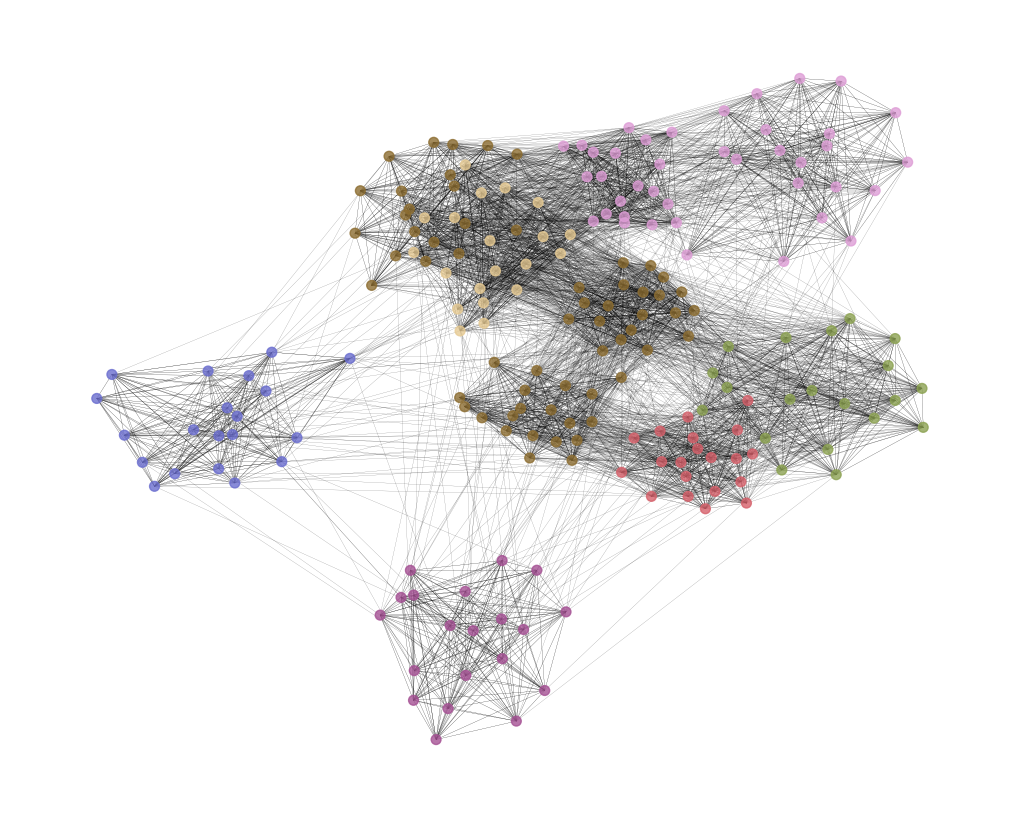

In [90]:
cmap1 = cm.get_cmap('tab20b',len(np.unique(mod_sc[0]))+1)
# node_colors = [ (n,cmap1(mod_sc[0][i]))  for i,n in enumerate(mod_sc_gr.nodes)]
node_colors = [ cmap1(mod_sc[0][i])  for i,n in enumerate(G_weighted_directed.nodes)]
options = {"linewidths": 0, "width": 0.1,'alpha':1.0}
#pos = nx.spring_layout(mod_sc_gr, seed=1,k=0.6)

plt.figure(figsize=(10, 8))
#seed = np.random.randint(0,999,1)
#print(seed)
pos = nx.spring_layout(G_weighted_directed, k=0.5,seed=4)
weights=[d['weight']*2 for _,_,d in G_weighted_directed.edges(data=True)]
nx.draw(G_weighted_directed, pos,nodelist=list(G_weighted_directed.nodes), node_color=node_colors, node_size=50, width=0.1, alpha = 0.8,arrows=False)

plt.savefig("./Figures/SC_coloured_graph.png", dpi=100)
#nx.draw(mod_sc_gr,nodelist=list(mod_sc_gr.nodes), pos=pos,**options,ax=ax[2],node_color=node_colors,node_size=50)
#ax[2].set_title("nodes colored according to their modules")